In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


#Data Gathering
#Original dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prosperLoanData/prosperLoanData1.csv


In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("../input/prosperLoanData/prosperLoanData1.csv")

In [3]:
# display information about the original dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Data Assessing and Cleaning
#choose subset of features important
#drop duplicated rows based on listing number
#convert datatypes of TotalTrades and TotalInquiries to int , ListingCreationDate to datetime
#removed rows without ProsperRating
#fill in missing values of occupation and DebtToIncomeRatio
#change listing category numeric to string.

# Subset the dataframe by selecting features of interest
cols = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
df_loan = loan[cols]

In [5]:
# display information about the subdataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  Occupation                 110349 non-null  object 
 11  Term                       113937 non-null  int64  
 12  EmploymentStatus           111682 non-null  object 
 13  TotalInquiries             11

In [6]:
# display random rows to get better understanding of the dataset and errors present
df_loan.sample(10)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
68210,1052353,2013-12-17 13:53:26.737000000,20000,Current,1,IN,0.19859,0.1620,5416.666667,C,Laborer,36,Employed,4.0,0.30,705.12,31.0,1
9121,364723,2008-07-09 16:54:44.420000000,1000,Defaulted,7,IL,0.37453,0.3500,4166.666667,NaN,Police Officer/Correction Officer,36,Full-time,11.0,0.06,45.24,16.0,1
43782,878100,2013-08-23 15:07:53.367000000,15000,Current,1,MI,0.12020,0.0924,6000.000000,A,Truck Driver,36,Employed,8.0,0.29,478.67,42.0,227
71317,38250,2006-09-10 14:41:07.387000000,12000,Completed,0,TX,0.24502,0.2375,2500.000000,NaN,Other,36,Not available,5.0,0.87,456.94,NaN,95
106249,1006844,2013-11-09 15:08:38.307000000,20000,Current,1,AZ,0.19859,0.1620,5583.333333,B,Skilled Labor,36,Employed,4.0,0.37,705.12,21.0,1
31292,888267,2013-09-05 15:59:08.453000000,15000,Current,1,TX,0.20462,0.1679,15333.333333,B,Professional,36,Employed,6.0,0.22,533.22,41.0,134
106863,394207,2008-09-07 07:55:39.187000000,1000,Chargedoff,5,MO,0.37453,0.3500,3072.000000,NaN,Administrative Assistant,36,Full-time,10.0,0.09,45.24,19.0,10
64232,562978,2012-02-26 09:35:37.647000000,7500,Current,1,WI,0.12782,0.0999,6250.000000,A,Other,36,Employed,0.0,0.07,241.97,10.0,129
47767,183554,2007-08-07 20:33:21.713000000,3200,Completed,0,IL,0.24507,0.2300,3588.000000,NaN,Professional,36,Full-time,22.0,0.33,86.06,19.0,92
60149,572995,2012-03-28 06:44:30.147000000,15000,Current,2,TN,0.20358,0.1845,2666.666667,B,Accountant/CPA,60,Employed,1.0,0.86,384.58,30.0,12


In [7]:
# drop duplicates in the dataset
df_loan = df_loan.drop_duplicates()

In [8]:
# selecting rows only where ProsperRating is not null as this is one of the most important features of the dataset 
# and filling in missing values is not possible.
df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

In [9]:
# filling missing values for the Occupation as unknown
df_loan.Occupation = df_loan.Occupation.fillna('Unknown')

In [10]:
# filling in missing values of DebtToIncomeRatio as mean of the column
df_loan.DebtToIncomeRatio = df_loan.DebtToIncomeRatio.fillna(df_loan.DebtToIncomeRatio.mean())

In [11]:
# converting datatypes of the required columns
df_loan.TotalInquiries = df_loan.TotalInquiries.astype(int)
df_loan.TotalTrades = df_loan.TotalTrades.astype(int)

In [12]:
# Splitting ListingCreationDate column into year,month,day,time
df_loan['year']=df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_loan['month'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [13]:
# unique values of month
df_loan.month.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

In [14]:
# replacing numerical values of month with names
df_loan.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],
                      ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)


In [15]:
# unique values of month
df_loan.month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [16]:
df_loan['ListingCreationDate'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [17]:
df_loan['day'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_loan['time'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [18]:
# drop the original ListingCreationDate column
df_loan.drop(columns = ['ListingCreationDate'],inplace = True)

In [19]:
#Exploratory Data Analysis

# display information about the cleaned dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              83982 non-null  int64  
 1   LoanOriginalAmount         83982 non-null  int64  
 2   LoanStatus                 83982 non-null  object 
 3   ListingCategory (numeric)  83982 non-null  int64  
 4   BorrowerState              83982 non-null  object 
 5   BorrowerAPR                83982 non-null  float64
 6   BorrowerRate               83982 non-null  float64
 7   StatedMonthlyIncome        83982 non-null  float64
 8   ProsperRating (Alpha)      83982 non-null  object 
 9   Occupation                 83982 non-null  object 
 10  Term                       83982 non-null  int64  
 11  EmploymentStatus           83982 non-null  object 
 12  TotalInquiries             83982 non-null  int64  
 13  DebtToIncomeRatio          83982 non-null  fl

In [20]:
# descriptive statistics for numeric variables
df_loan.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000
mean,7.712395e+05,9061.224381,3.321771,0.226945,0.19630,5.930614e+03,42.462813,4.285514,0.258692,291.40139,23.925115,68.677788
std,2.359100e+05,6279.649648,4.368851,0.080047,0.07475,8.268432e+03,11.639032,3.828780,0.305687,186.47539,11.610432,95.318077
min,4.162750e+05,1000.000000,0.000000,0.045830,0.04000,0.000000e+00,12.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,5.570608e+05,4000.000000,1.000000,0.163610,0.13590,3.426938e+03,36.000000,2.000000,0.160000,157.11250,15.000000,1.000000
50%,7.341785e+05,7500.000000,1.000000,0.219450,0.18750,5.000000e+03,36.000000,3.000000,0.240000,251.28000,23.000000,32.000000
75%,9.756778e+05,13500.000000,3.000000,0.292540,0.25740,7.083333e+03,60.000000,6.000000,0.310000,387.62000,31.000000,98.000000
max,1.255725e+06,35000.000000,20.000000,0.423950,0.36000,1.750003e+06,60.000000,78.000000,10.010000,2251.51000,122.000000,1189.000000


In [21]:
#Univariate Exploration

# month into ordered categorical types
rate_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['month'] = df_loan['month'].astype(ordered_var)
df_loan.groupby('month')['ListingNumber'].count()

month
Jan     9036
Feb     7887
Mar     5376
Apr     4906
May     5469
Jun     5805
Jul     6630
Aug     6401
Sept    7480
Oct     8586
Nov     8122
Dec     8284
Name: ListingNumber, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

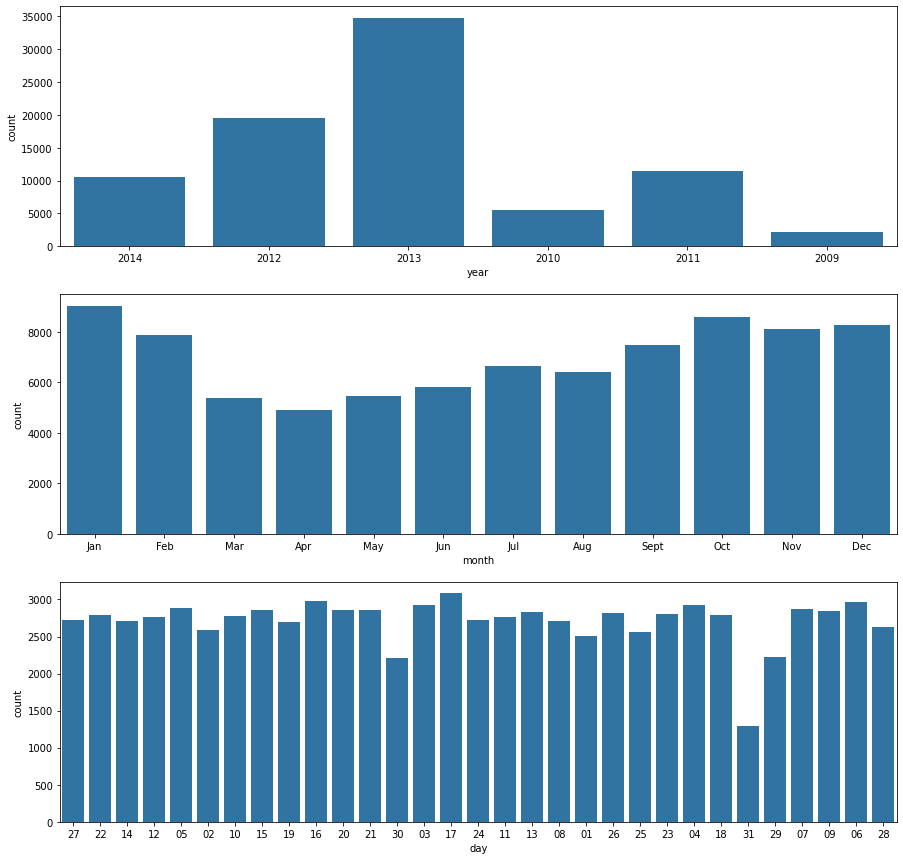

In [22]:
# countplots of loans listed year, month and day of the month wise
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'year', color = default_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'month', color = default_color, ax = ax[1])
sb.countplot(data = df_loan, x = 'day', color = default_color, ax = ax[2])

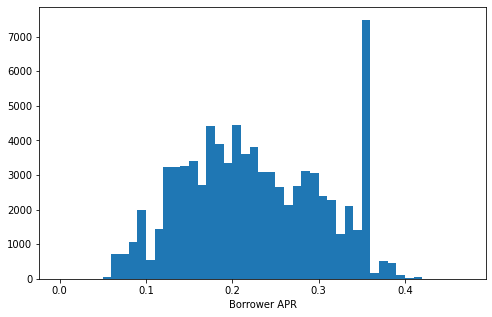

In [23]:
#distribution of the main variable of interest: borrower APR

bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

#The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

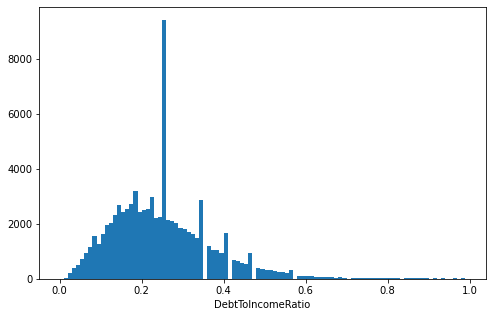

In [24]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');

#Distribution has unimodal peak around 0.2 with unusual peak around 0.25 which indicates most people prefer 1:4 ratio of debt to Income which is a good thing.

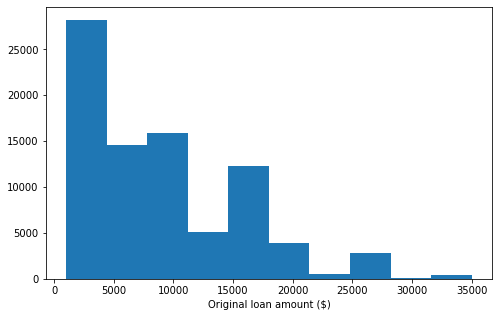

In [25]:
#distribution of the first predictor variable of interest: LoanOriginalAmount

plt.figure(figsize=[8, 5])
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)');

#The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k.It means that most of the loans are multiples of 5k.

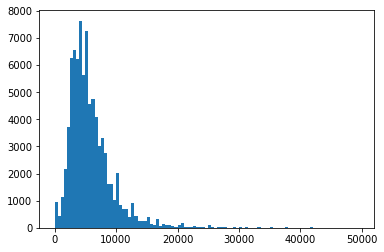

In [26]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins_smi);

#The distribution of stated monthly income is severely right screwed, with stated monthly income less than 30k. and peak around 6K. There are some outliers around 100K and 50K which should be removed

In [27]:
df_loan = df_loan[df_loan.StatedMonthlyIncome<30000]

In [28]:
#distributions of Occupation, Prosper rating and employment status

# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype(ordered_var)

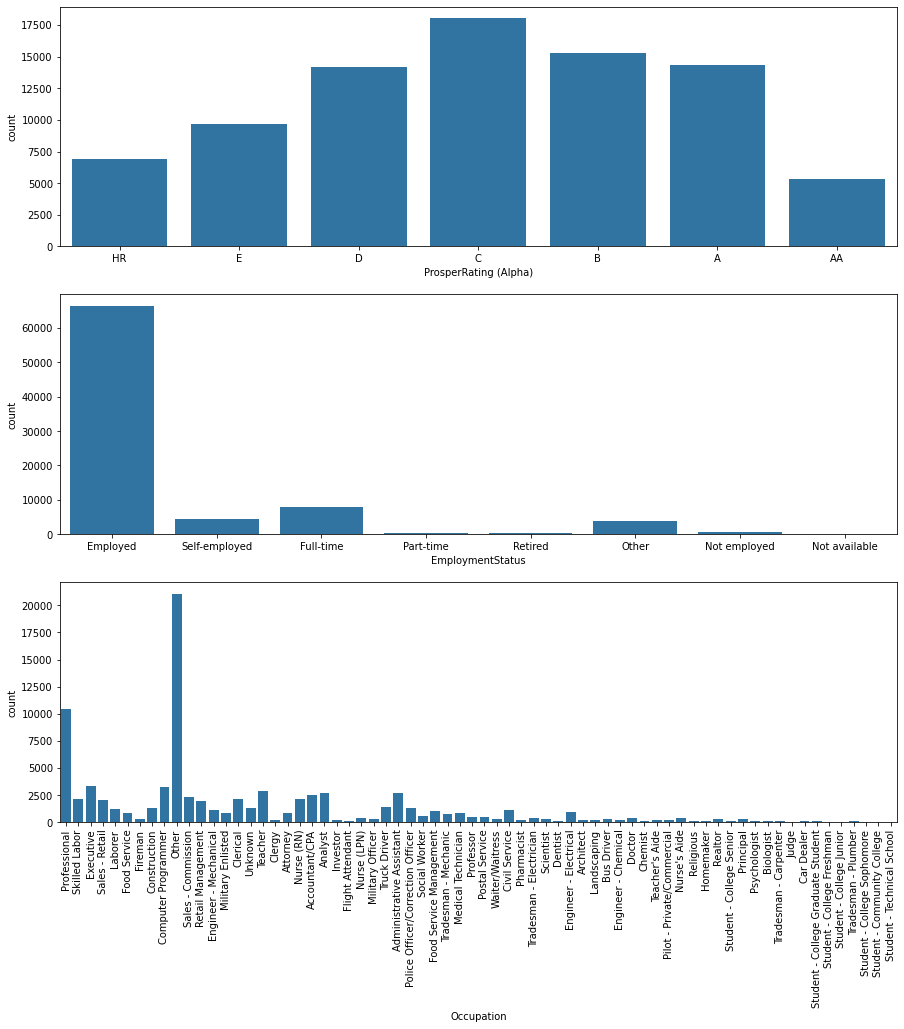

In [29]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
sb.countplot(data = df_loan, x = 'Occupation', color = default_color, ax = ax[2]);
plt.xticks(rotation=90);

#The least of the borrowers are students. The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.

In [30]:
#Bivariate Exploration
#pairwise correlations present between features in the data.
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio']
cat_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus','Occupation']

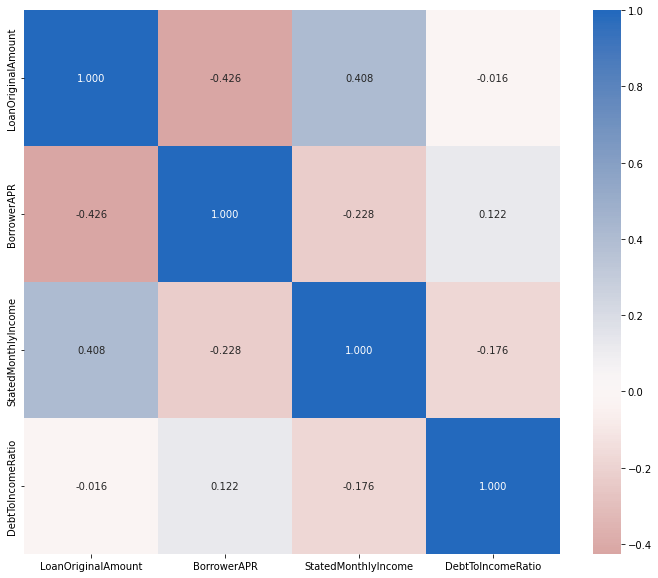

In [31]:
# correlation plot
plt.figure(figsize = [12, 10])
sb.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

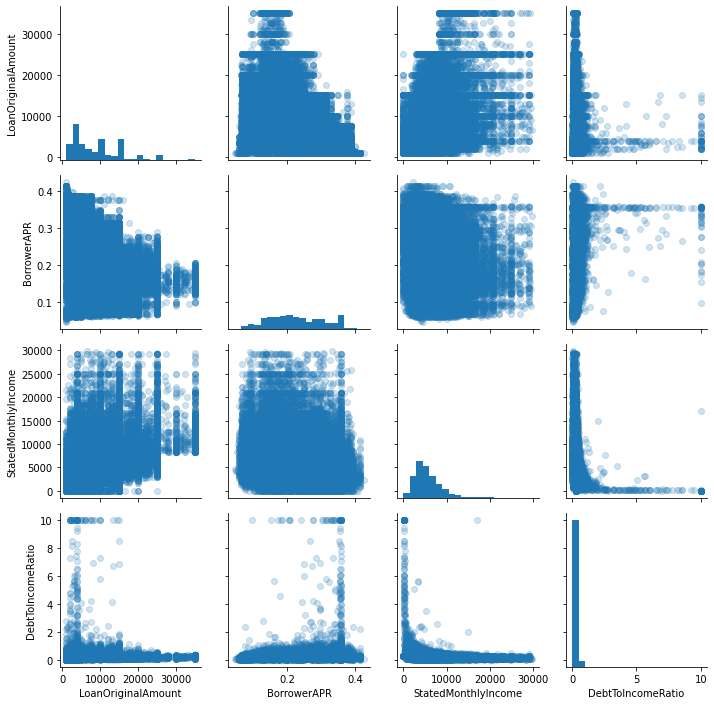

In [32]:
g = sb.PairGrid(data = df_loan, vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<Figure size 1440x1440 with 0 Axes>

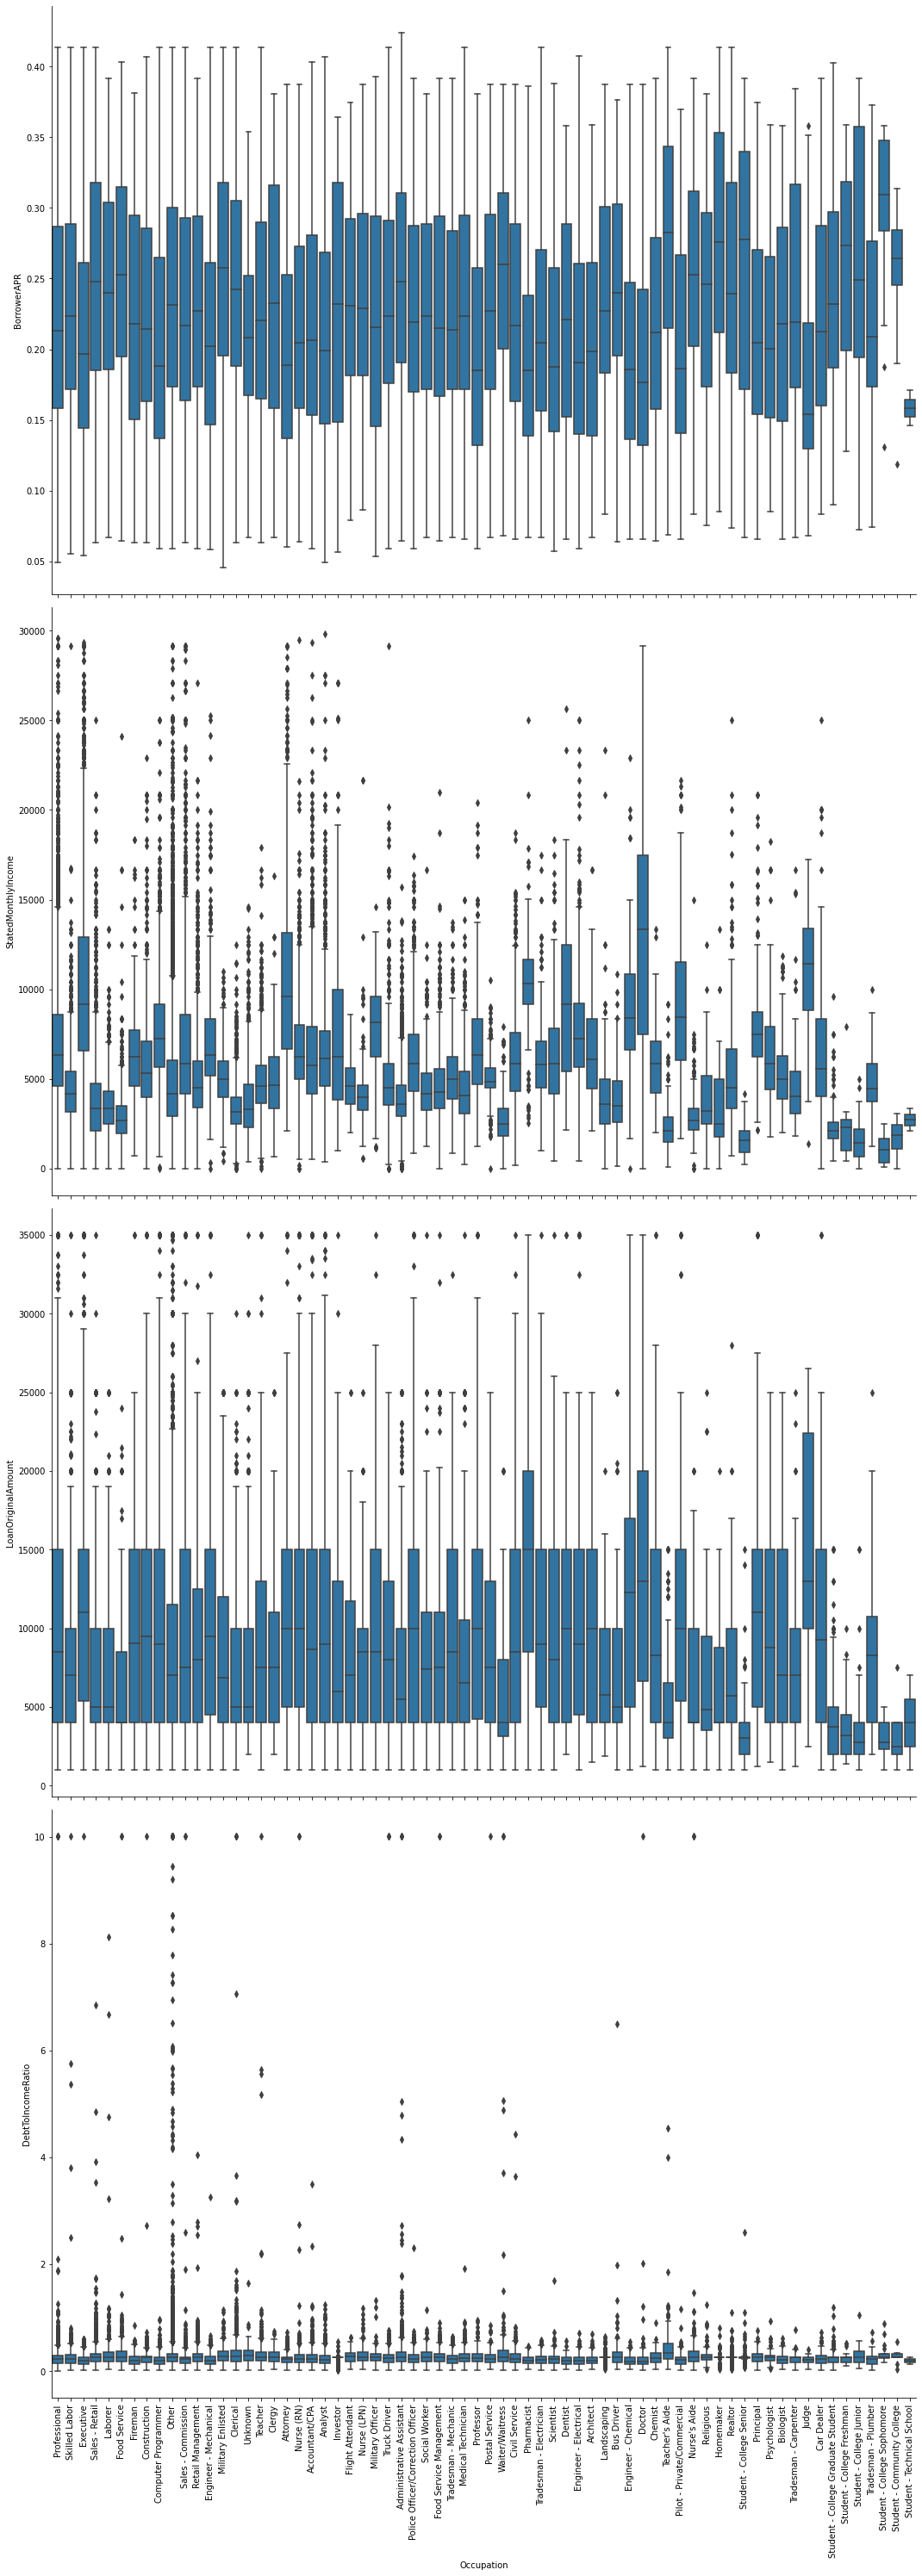

In [33]:
#borrower APR, stated monthly income and loan original amount correlating with the categorical variables

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Occupation'] , height = 10, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<Figure size 720x720 with 0 Axes>

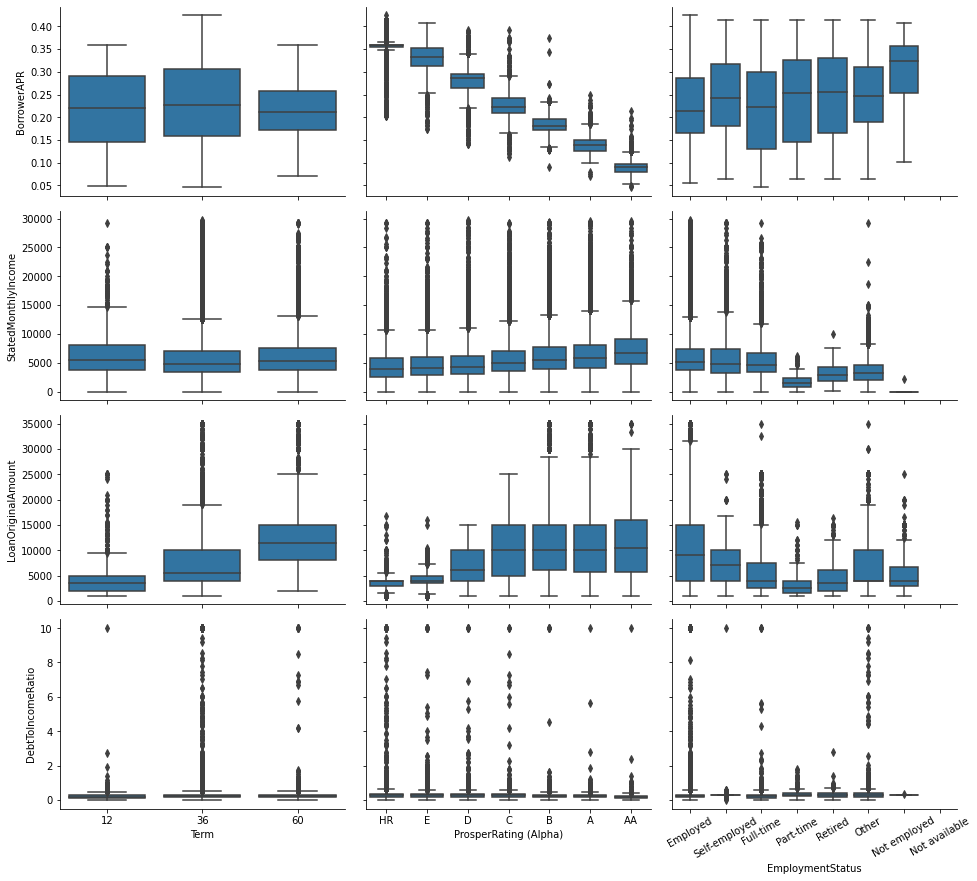

In [34]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

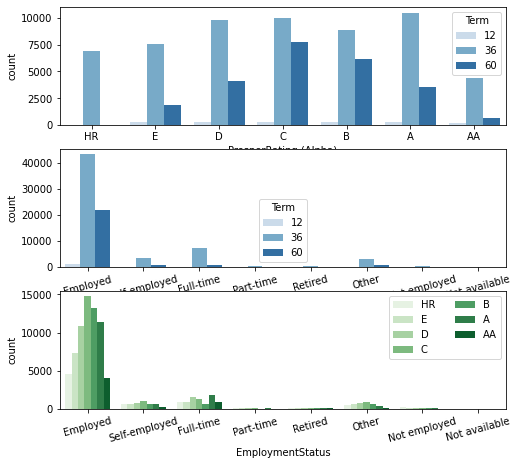

In [35]:
#relationships between the four categorical features

plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)


# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

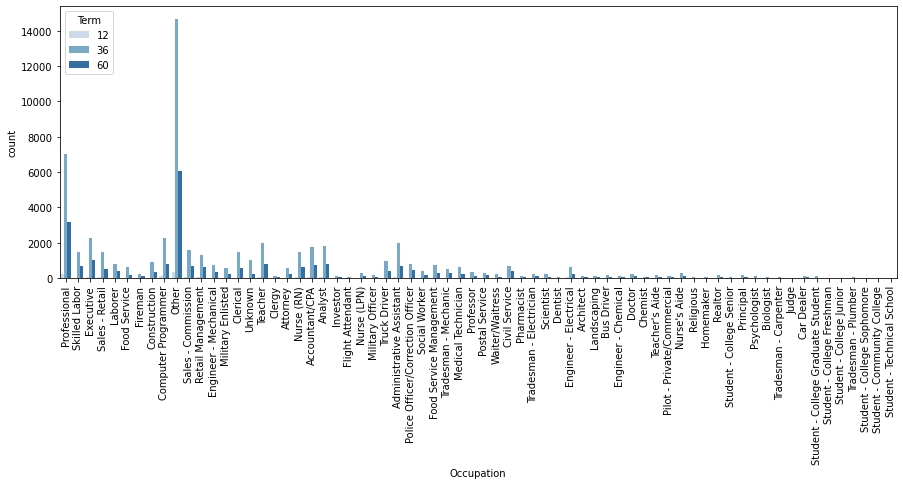

In [36]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sb.countplot(data = df_loan, x = 'Occupation', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=90);

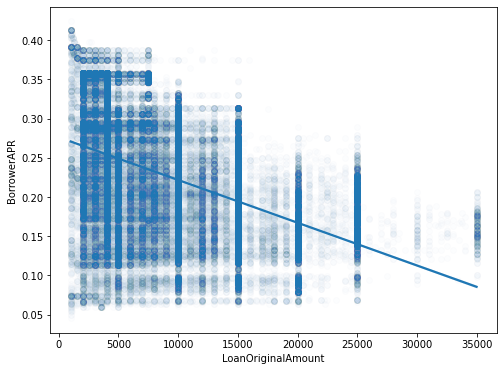

In [37]:
#borrower APR and loan original amount related to one another for all of the data

plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

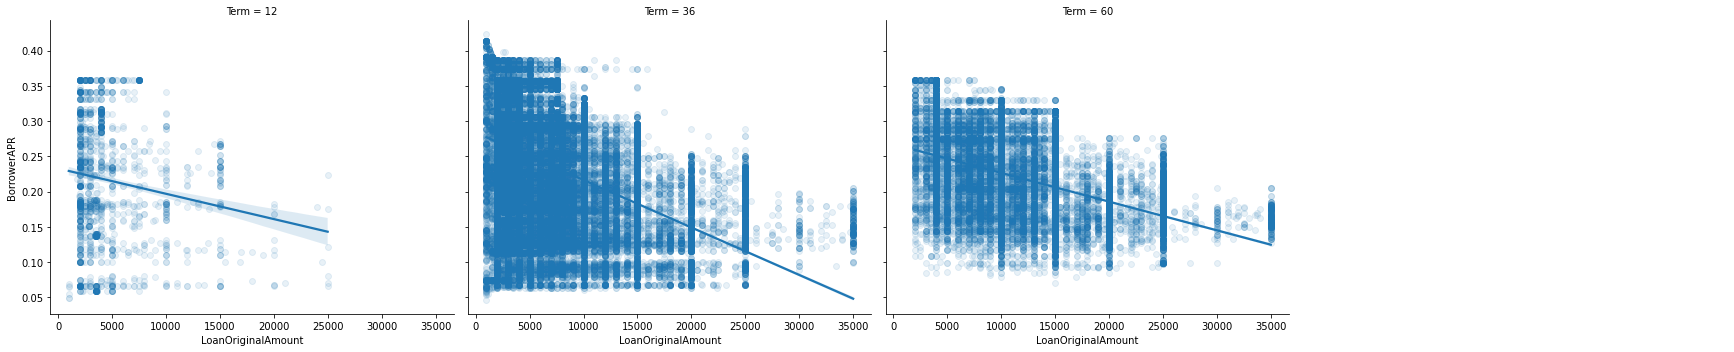

In [38]:
#Multivariate Exploration
#role of categorical variable (Prosper rating and term) into the relationship between borrower APR and loan original amount
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= df_loan, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

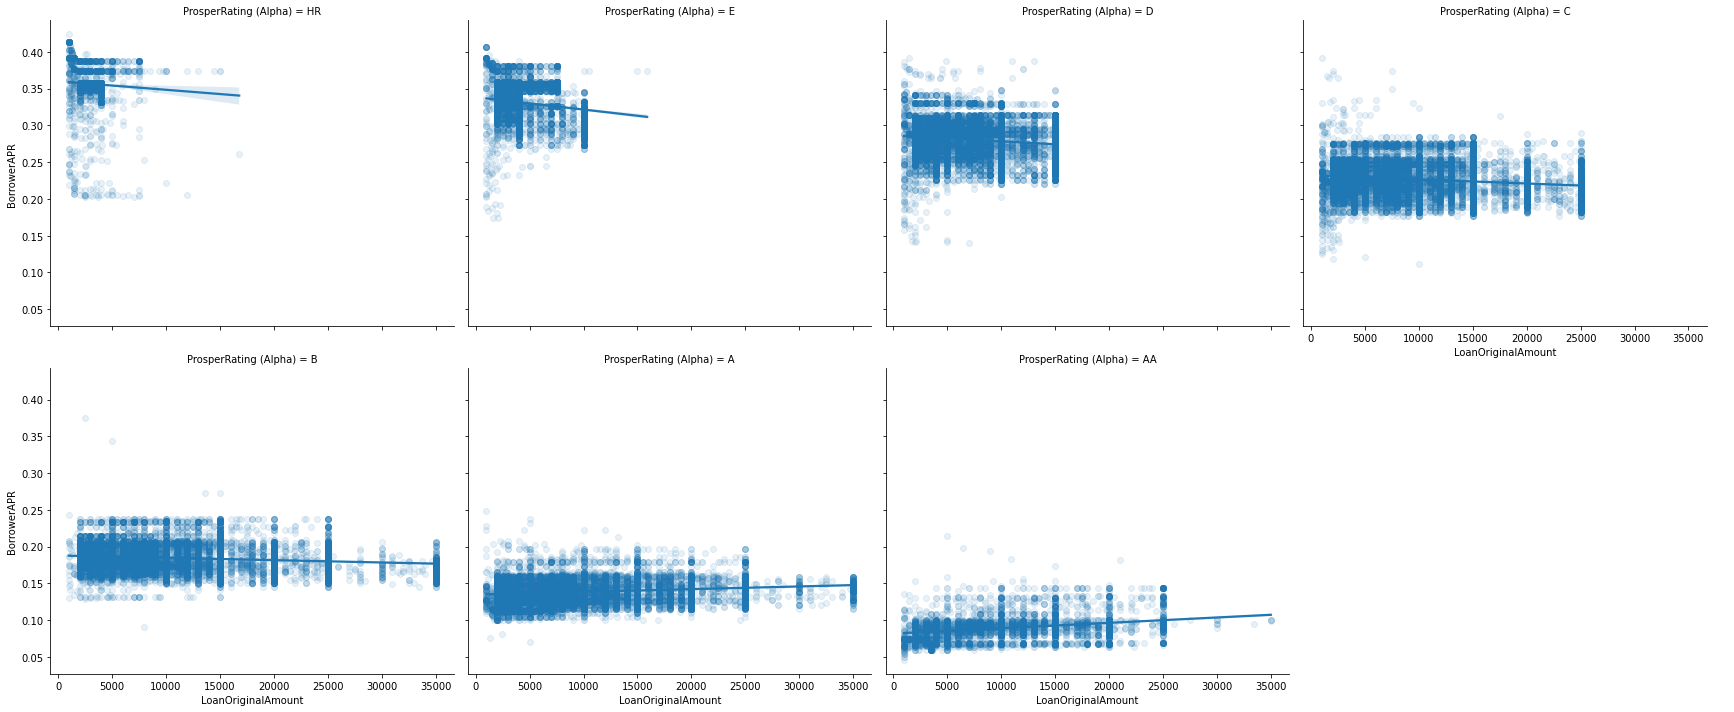

In [39]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

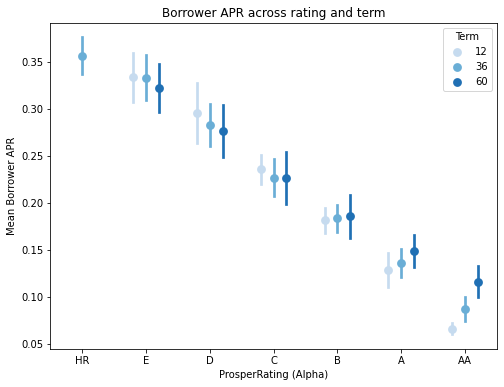

In [40]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

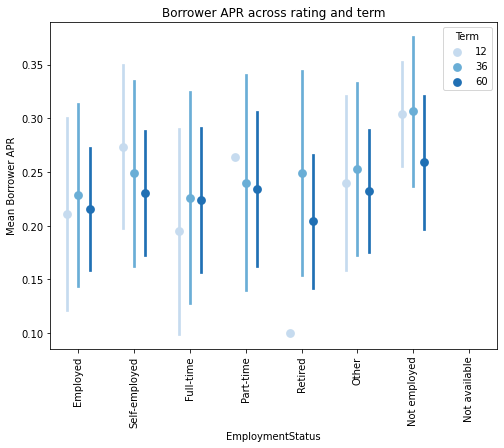

In [41]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

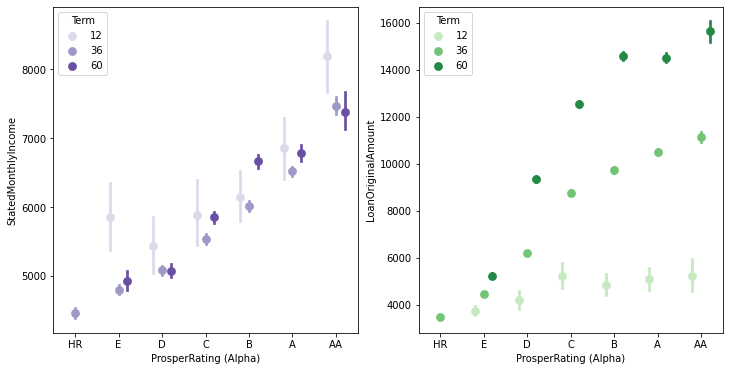

In [42]:
#rating and term effects on stated monthly income and loan original amount variables

fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

In [43]:
# save the cleaned dataset for explanatory data analysis
df_loan.to_csv('./LoanData_cleaned.csv')